# Integrantes

Martín Vazquez Arispe mvazquezarispe@alumnos.exa.unicen.edu.ar

David Burckhardt dburckhardt@alumnos.exa.unicen.edu.ar

# Enunciado

Dados los siguientes dataset utilizados en los prácticos 2.a y 2.b:

Palmer Penguins Dataset (OpenML id 43347 : https://www.openml.org/d/43347/)

Spam en mensajes de texto (adjunto, versión en jsons)


Resolver para cada dataset los siguiente puntos:


a. Definir cuál es el objetivo de aplicar técnicas de clasificación.

b. En caso de ser necesario, definir qué pre‐procesamiento se realizará a los datos. Justificar.

d. Obtener dos clasificadores utilizando la librería Scikit learn. Para ello elegir 2 técnicas de clasificación, configurar los clasificadores, y ejecutar los algoritmos. Justificar las decisiones tomadas.

e. Evaluar los dos clasificadores y compararlos, indicando cual de los dos recomendaría.

f. Explicar un ejemplo de cómo los clasificadores obtenidos pueden ser usados en el futuro en una aplicación real.

## Consigna: A

*Definir cuál es el objetivo de aplicar técnicas de clasificación*

Las técnicas de clasificación tienen como objetivo asignar una etiqueta o categoría a nuevas observaciones basándose en un conjunto de datos previamente etiquetado. Estos métodos aprenden patrones o relaciones entre los datos de entrada y la variable objetivo para luego poder realizar predicciones automáticas sobre datos no vistos.

El objetivo de aplicar técnicas de clasificación en este dataset es predecir la especie de pingüino (Adelie, Chinstrap o Gentoo) a partir de distintas características físicas y geográficas de los ejemplares, como el largo y ancho del pico, largo de la aleta, masa corporal, isla de procedencia y sexo.


## Consigna: B

*En caso de ser necesario, definir qué pre‐procesamiento se realizará a los datos. Justificar.*

#### Pasos

1. Tratamiento de datos faltantes: Se eliminaron las filas con valores faltantes en la columna "sex" para evitar introducir ruido en el modelo, ya que representaban una pequeña porción del total y no comprometían la cantidad de datos.

2. Se separo del dataset la columna *species* que va a ser la categoria a predecir por el modelo

2. Se aplicó OneHotEncoder a las columna categórica *island* y un OrdinalEncoder a la columna *sex* para transformarlas en valores numéricos compatibles con los clasificadores.

3. Se normalizaron las variables numéricas para que todas tengan la misma escala, lo cual es esencial para modelos sensibles a distancias como KNN y SVM, y mejora la estabilidad general del entrenamiento.

In [ ]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.3 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=e340684ee170f337b1dfa69e351ac6d2118f0f4b37fb9b3f4c7209acc7883f18
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
from sklearn.datasets import fetch_openml
import openml

# Lee el dataset desde OpenMl utilizando la funcionalidad de SKLearn
data = openml.datasets.get_dataset(43347)
X, y, categorical_indicator, attribute_names = data.get_data(
    dataset_format='dataframe',
    target=data.default_target_attribute
)
df = X.copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

island_col = ['island']
sex_col = ['sex']
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

island_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

sex_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessing_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_transformer, num_cols),
        ("island", island_transformer, island_col),
        ("sex", sex_transformer, sex_col),
    ]))
])

df = df.dropna(subset=['sex'])
features = df.drop(columns=['species'])
labels = df['species']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar y
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Consigna: D
*Obtener dos clasificadores utilizando la librería Scikit learn. Para ello elegir 2 técnicas de clasificación, configurar los clasificadores, y ejecutar los algoritmos. Justificar las decisiones tomadas.*

Se utilizó una partición estratificada para asegurar que la proporción de cada clase en el conjunto de entrenamiento y test sea representativa del dataset original. Esto es especialmente importante en problemas de clasificación para evitar sesgos y garantizar que el modelo aprenda y se evalúe correctamente sobre todas las clases presentes, manteniendo la distribución balanceada de especies en ambos subconjuntos.
Se eligió un test_size=0.2 para reservar el 20% del dataset como conjunto de prueba, lo cual es adecuado cuando se dispone de una cantidad limitada de muestras.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

Para evaluar el rendimiento de los cuatro clasificadores, se aplicó validación cruzada con K-Fold sobre el conjunto de entrenamiento, utilizando un k igual a 5 que da un buen equilibrio entre precisión y eficiencia computacional. En cada fold, se entrenó el modelo y se calcularon métricas como accuracy, precision, recall y F1-score. Luego, se obtuvo el promedio de estas métricas para cada clasificador, lo que permite una evaluación completa del rendimiento en conjuntos balanceados o desbalanceados. A partir de estos promedios, se identificaron los dos modelos con mejor rendimiento general para seleccionarlos como los más adecuados para el problema.

#### Funciones auxiliares

**apply_cross_validation:** Aplica validación cruzada K-Fold al pipeline y devuelve el promedio de cuatro métricas de evaluación.

**print_metrics:** Imprime en consola los valores promedio de accuracy, precision, recall y F1-score obtenidos tras la validación.

In [ ]:
from sklearn.model_selection import cross_validate, KFold
import numpy as np

def apply_cross_validation(pipeline):
  # Se define el KFold
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Validación cruzada y definición de las metricas a obtener
  scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
  scores_dt = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring)

  return (
      np.mean(scores_dt['test_accuracy']),
      np.mean(scores_dt['test_precision_macro']),
      np.mean(scores_dt['test_recall_macro']),
      np.mean(scores_dt['test_f1_macro'])
  )

def print_metrics(accuracy, precision, recall, f1_score):
  print(f"Accuracy promedio: {accuracy:.4f}")
  print(f"Precision promedio: {precision:.4f}")
  print(f"Recall promedio: {recall:.4f}")
  print(f"F1-score promedio: {f1_score:.4f}")

#### Arbol de Desición

El Árbol de Decisión se eligió por ser un modelo sencillo e interpretable, ideal como primera aproximación al problema de clasificación. Permite entender cómo cada variable contribuye a la predicción mediante reglas claras y divisiones sucesivas. Además, no requiere escalado, maneja variables categóricas y numéricas ya codificadas, y puede capturar relaciones no lineales, lo que lo hace útil para evaluar tanto la estructura del dataset como la efectividad del preprocesamiento.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

accuracy_mean_dt, precision_mean_dt, recall_mean_dt, f1_mean_dt = apply_cross_validation(pipeline_dt)

print_metrics(accuracy_mean_dt, precision_mean_dt, recall_mean_dt, f1_mean_dt)

Accuracy promedio: 0.9510
Precision promedio: 0.9394
Recall promedio: 0.9549
F1-score promedio: 0.9441


#### Naive Bayes

Naive Bayes se eligió por su simplicidad y rapidez, ideal para probar modelos base en datasets pequeños como este. Aunque asume independencia entre variables algo que no siempre se cumple, puede dar buenos resultados cuando las clases están bien diferenciadas. Es útil como punto de comparación frente a modelos más complejos.

In [ ]:
from sklearn.naive_bayes import GaussianNB

pipeline_nb = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", GaussianNB())
])

accuracy_mean_nb, precision_mean_nb, recall_mean_nb, f1_mean_nb = apply_cross_validation(pipeline_nb)

print_metrics(accuracy_mean_nb, precision_mean_nb, recall_mean_nb, f1_mean_nb)

Accuracy promedio: 0.7185
Precision promedio: 0.7667
Recall promedio: 0.7859
F1-score promedio: 0.6903


#### SVM

SVM es un clasificador robusto y eficaz para datasets con pocas dimensiones como es el caso. Aprovecha las variables normalizadas al basarse en distancias, funciona bien en clasificación multiclase y, mediante su margen máximo, reduce el riesgo de sobreajuste.

Margen: 1.0 --> Se está utilizando un valor moderado, ni demasiado flexible ni demasiado estricto.

Kernel: Linear --> El dataset tiene solo 6 características, lo cual es ideal para un modelo lineal.

In [ ]:
from sklearn.svm import SVC

pipeline_svm = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", SVC(kernel="linear", C=1.0, random_state=42))
])

accuracy_mean_svm, precision_mean_svm, recall_mean_svm, f1_mean_svm = apply_cross_validation(pipeline_svm)

print_metrics(accuracy_mean_svm, precision_mean_svm, recall_mean_svm, f1_mean_svm)

Accuracy promedio: 0.9925
Precision promedio: 0.9930
Recall promedio: 0.9917
F1-score promedio: 0.9919


#### KNN

KNN es una buena elección para este dataset porque funciona bien con pocos datos y no requiere entrenamiento complejo. Como las variables numéricas están normalizadas, las distancias entre muestras son representativas, lo que mejora la precisión del modelo. Además, al haber pocas muestras, la predicción es rápida y eficiente, sin volverse costosa como en datasets grandes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

accuracy_mean_knn, precision_mean_knn, recall_mean_knn, f1_mean_knn = apply_cross_validation(pipeline_knn)

print_metrics(accuracy_mean_knn, precision_mean_knn, recall_mean_knn, f1_mean_knn)

Accuracy promedio: 0.9962
Precision promedio: 0.9963
Recall promedio: 0.9958
F1-score promedio: 0.9959


#### Gráficos Comparativos

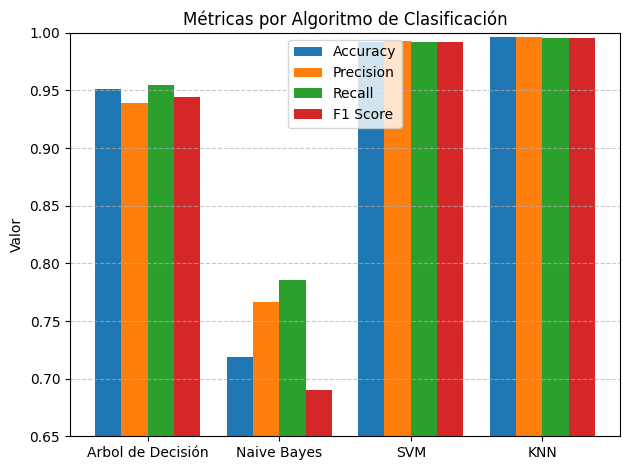

In [ ]:
import matplotlib.pyplot as plt

# Modelos
modelos = ['Arbol de Decisión', 'Naive Bayes', 'SVM', 'KNN']

# Métricas
accuracy = [accuracy_mean_dt, accuracy_mean_nb, accuracy_mean_svm, accuracy_mean_knn]
precision = [precision_mean_dt, precision_mean_nb, precision_mean_svm, precision_mean_knn]
recall = [recall_mean_dt, recall_mean_nb, recall_mean_svm, recall_mean_knn]
f1_score = [f1_mean_dt, f1_mean_nb, f1_mean_svm, f1_mean_knn]

# Posiciones
x = np.arange(len(modelos))
width = 0.2  # ancho de las barras

fig, ax = plt.subplots()
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

ax.set_ylabel('Valor')
ax.set_title('Métricas por Algoritmo de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

plt.ylim(0.65, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusiones

KNN mostró el mejor rendimiento general en todas las métricas, indicando una clasificación casi perfecta en todos los folds. Esto sugiere que el modelo se adapta muy bien a la estructura del dataset, posiblemente gracias a la normalización de las variables numéricas.

SVM también tuvo un rendimiento excelente, muy cercano al de KNN. Su capacidad para encontrar márgenes óptimos en datos bien preprocesados lo hace una opción muy sólida, especialmente con pocas dimensiones como en este caso.

## Consigna E

*Evaluar los dos clasificadores y compararlos, indicando cual de los dos recomendaría.*

Para la evaluación final, se entrenaron los dos clasificadores seleccionados —KNN y SVM— utilizando todo el conjunto de entrenamiento disponible. Luego, se evaluaron sus métricas sobre el conjunto de prueba para obtener una estimación realista de su desempeño en datos nuevos. Esta comparación directa permite identificar cuál de los dos modelos ofrece un mejor equilibrio entre precisión, sensibilidad y generalización, y así recomendar el clasificador más adecuado para su uso en aplicaciones reales.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenar modelos finales con todo el set de entrenamiento
pipeline_svm.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

# Evaluar en el set de prueba
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

# Métricas
def obtener_metricas(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average='macro'),
        "recall_macro": recall_score(y_true, y_pred, average='macro'),
        "f1_macro": f1_score(y_true, y_pred, average='macro')
    }

metricas_svm = obtener_metricas(y_test, y_pred_svm)
metricas_knn = obtener_metricas(y_test, y_pred_knn)

print("Métricas para SVM:")
print(metricas_svm)

print("\nMétricas para KNN:")
print(metricas_knn)

Métricas para SVM:
{'accuracy': 1.0, 'precision_macro': 1.0, 'recall_macro': 1.0, 'f1_macro': 1.0}

Métricas para KNN:
{'accuracy': 0.9850746268656716, 'precision_macro': 0.9777777777777779, 'recall_macro': 0.9885057471264368, 'f1_macro': 0.9826577939100626}


### Conclusiones

Luego de entrenar los dos clasificadores seleccionados (KNN y SVM) sobre el conjunto de entrenamiento completo, se evaluaron en el conjunto de prueba. Ambos modelos mostraron un rendimiento excelente, pero el SVM alcanzó un desempeño perfecto, con accuracy, precision, recall y F1-score iguales a 1.0, lo que indica que clasificó correctamente todos los ejemplos de prueba. Por su parte, KNN también obtuvo métricas muy altas, con un accuracy del 98.5%, y valores ligeramente inferiores en las demás métricas.

#### Clasificador elegido: SVM

Si bien ambos son adecuados, se recomienda el uso de SVM por su mejor capacidad de generalización en este caso, mostrando máxima precisión y robustez en datos no vistos.

## Consigna F

*Explicar un ejemplo de cómo los clasificadores obtenidos pueden ser usados en el futuro en una aplicación real.*

Un posible uso real de los clasificadores obtenidos sería en una aplicación de monitoreo de fauna en reservas naturales o estaciones científicas. Por ejemplo, un sistema podría recibir mediciones físicas de pingüinos (como longitud del pico, masa corporal, etc.) tomadas en el campo por biólogos, y utilizar el modelo entrenado para predecir automáticamente la especie. Esto agilizaría el trabajo de clasificación, reduciría errores humanos y permitiría registrar información de forma rápida y sistemática, incluso por personal no experto en taxonomía.